In [34]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
img1 = cv2.imread('DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

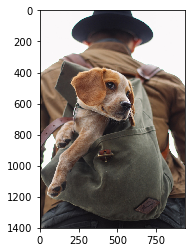

In [36]:
plt.imshow(img1)

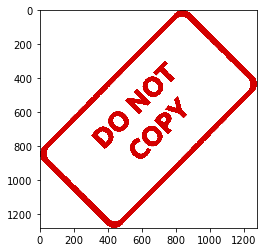

In [37]:
plt.imshow(img2)

In [38]:
img1.shape

(1401, 934, 3)

In [39]:
img2.shape

(1280, 1277, 3)

. 

As they are not of the same size, we have to resize them to be of the same size

.

In [40]:
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

Now the images are gonna be a bit distorted and will have to be squeezed shorter than they actually were

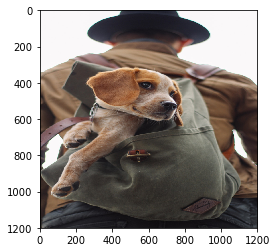

In [41]:
plt.imshow(img1)

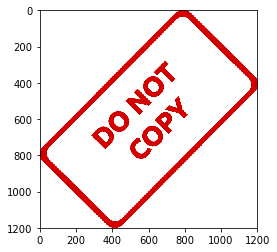

In [42]:
plt.imshow(img2)

now to blend them together we use the function   "addWeighted"    which uses the formula

  new image = image 1 * alpha + image 2 * beta + gamma
 
 where,
     alpha is multiplied by the image1 and is made to be that blended
     beta is multiplied by the image2 and is made to be that blended 
     gamma can change the image in other ways that I don't know of

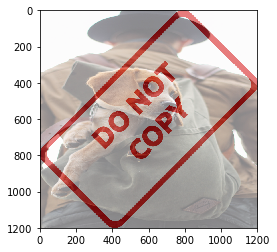

In [43]:
blendedImage = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)
plt.imshow(blendedImage)

Both the images are blended the same amount and the white background of the img2 also fades the img1 a bit.

To make it such that img1 is more pronounced

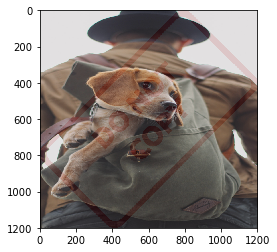

In [44]:
blendedImage = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.1, gamma=0)
plt.imshow(blendedImage)

The main thing is that these both images were of same size

If both images are of not of the same shape i.e. one is bigger and other is smaller

Then we can do two things:
1. overlay the small image on top of the larger image but WITHOUT BLENDING.
    just using the numpy reassignment
    
2. actually blend togehter two images of different sizes


# overlay the small image on top of the larger image but WITHOUT BLENDING. 

In [48]:
# lets just import the images again
img1 = cv2.imread('DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [49]:
img2 = cv2.resize(img2, (600,600))

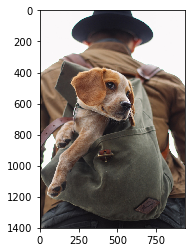

In [50]:
plt.imshow(img1)

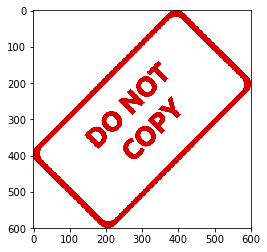

In [51]:
plt.imshow(img2)

In [52]:
# now lets just rename them for convenience
larger_img = img1
smaller_img = img2

In [53]:
# these are values on x and y axis on the larger image where we want the smaller image left top most corner to be on

x_offset = 0
y_offset = 0

# we are here just starting at the top point of the image at the top left

In [54]:
smaller_img.shape

(600, 600, 3)

In [55]:
# These are basically the size of the smaller image and upto where to slice on the bigger image to put the smaller
# image into i.e. again the size
# we can set them to offset + the size of the image

x_end = x_offset + smaller_img.shape[1]
y_end = y_offset + smaller_img.shape[0]

# we have to remember that how numpy sees the  image and how it is displayed are different and that is why 
# we give x_end the no. of columns i.e. the width of the smaller image
# and  give y_end the no. of rows i.e. the length of the smaller image

In [56]:
# Now the main line where we do the main work
# The below command basically some chunk of x and some chunk of y and sets it to be the smaller image
# again numpy sees the  image and how it is displayed are different
# so we first pass the y things that are the width of the image and then the y things that are the lenth of the image

larger_img[y_offset:y_end, x_offset:x_end] = smaller_img

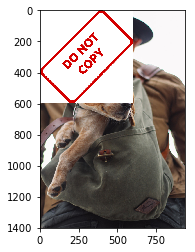

In [57]:
plt.imshow(larger_img)

_______
--------

## Blending Images of Different Sizes

### Imports

In [21]:
import numpy as np
import cv2

### Importing the images again and resizing

In [22]:
# Load two images
img1 = cv2.imread('DATA/dog_backpack.png')
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

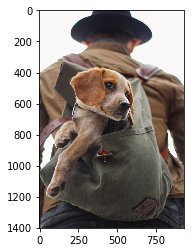

In [23]:
plt.imshow(img1)

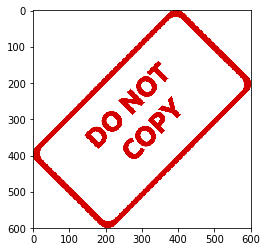

In [24]:
plt.imshow(img2)

### Create a Region of Interest (ROI)

In [25]:
img1.shape

(1401, 934, 3)

In [26]:
x_offset=934-600
y_offset=1401-600

In [27]:
# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ] # TOP LEFT CORNER
roi = img1[y_offset:1401,x_offset:943] # BOTTOM RIGHT CORNER

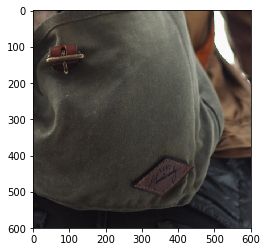

In [28]:
plt.imshow(roi)

In [29]:
roi.shape

(600, 600, 3)

### Creating a Mask

In [30]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [31]:
img2gray.shape

(600, 600)

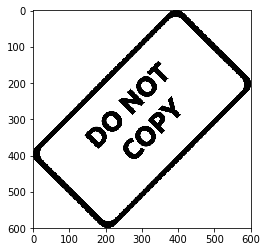

In [32]:
plt.imshow(img2gray,cmap='gray')
#what a mask will basically do is once its on top of imp2 that is the watermark 
# it will only allow the the img to go through the mask only on white portions and block the black portions

In [33]:
# That is why we need to inverse the white and black areas of the watermark of img2gray
mask_inv = cv2.bitwise_not(img2gray)

In [34]:
mask_inv.shape

(600, 600)

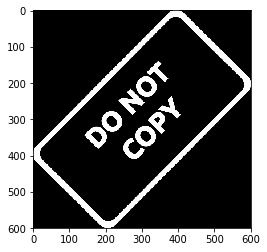

In [35]:
plt.imshow(mask_inv,cmap='gray')

## Convert Mask to have 3 channels

In [36]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [37]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [38]:
bk.shape

(600, 600, 3)

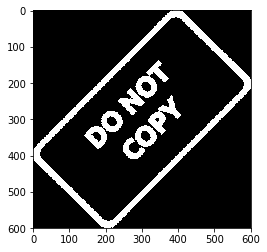

In [39]:
plt.imshow(bk)

### Grab Original FG image and place on top of Mask

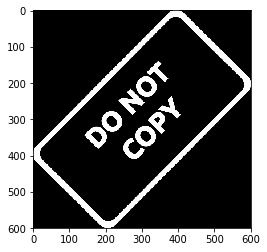

In [40]:
plt.imshow(mask_inv,cmap='gray')

In [41]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

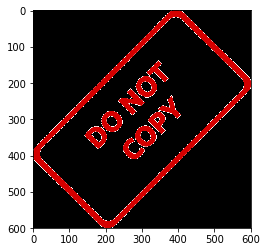

In [42]:
plt.imshow(fg)

In [43]:
fg.shape

(600, 600, 3)

### Get ROI and blend in the mask with the ROI

In [44]:
final_roi = cv2.bitwise_or(roi,fg)

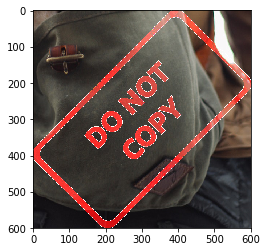

In [45]:
plt.imshow(final_roi)

### Now add in the rest of the image

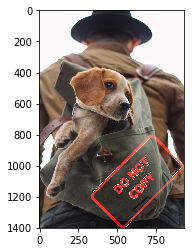

In [46]:
large_img = img1
small_img = final_roi


large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)